## Seaborns的使用


模型构建时，为了尽量避免过拟合，需要尽量剔除"噪声数据"的影响，例如极大极小值等。

不同的数据之间尽量具有可比性，数据范围尽量一致。

### 一、绘制单变量柱状图和密度分布图

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
df = DataSource('financial_statement_ff_CN_STOCK_A').read(start_date='2017-01-01',end_date='2019-01-02').dropna()
df_section = df[df.date=='2017-01-05']
df.head()

,instrument,fs_account_payable_0,fs_account_receivable_0,fs_bps_0,fs_capital_reserves_0,fs_paicl_up_capital_0,fs_cash_ratio_0,fs_construction_in_process_0,fs_deducted_profit_0,fs_deducted_profit_ttm_0,...,fs_total_profit_0,fs_undistributed_profit_0,fs_common_equity_0,fs_eps_yoy_0,fs_net_profit_yoy_0,fs_operating_revenue_yoy_0,fs_quarter_0,fs_quarter_year_0,fs_quarter_index_0,date
2,600863.SHA,1.352382e+09,1.141162e+09,1.8109,8.291640e+08,5.807745e+09,0.036117,5.116226e+09,539757440.0,312555136.0,...,1.081192e+09,2.492517e+09,1.051745e+10,-43.750000,-41.331902,-21.780500,20160930,2016,3,2017-01-03
14,002572.SZA,3.186333e+08,1.011826e+08,7.7982,1.909549e+09,4.617132e+08,1.635543,4.859272e+08,400167520.0,577769152.0,...,5.426323e+08,1.109655e+09,3.600520e+09,46.031746,48.037102,43.468498,20160930,2016,3,2017-01-03
34,600582.SHA,6.023388e+09,1.245318e+10,3.2711,1.265767e+09,4.138589e+09,0.537651,1.250605e+09,323503168.0,790291392.0,...,4.855433e+08,7.787382e+09,1.353766e+10,-48.235294,-48.293900,-26.865400,20160930,2016,3,2017-01-03
79,600749.SHA,2.655415e+07,1.885127e+07,3.2174,4.398794e+08,1.891379e+08,0.118568,2.192287e+08,-29723870.0,-53586152.0,...,-2.656203e+07,-2.612845e+07,6.085352e+08,19.884394,19.882999,-7.814400,20160930,2016,3,2017-01-03
85,000959.SZA,1.800606e+10,1.436453e+09,4.6460,2.009120e+10,5.289390e+09,0.107572,2.407692e+10,114808008.0,-468147648.0,...,2.585132e+08,-7.817976e+09,2.457447e+10,128.524231,128.484695,3.990000,20160930,2016,3,2017-01-03


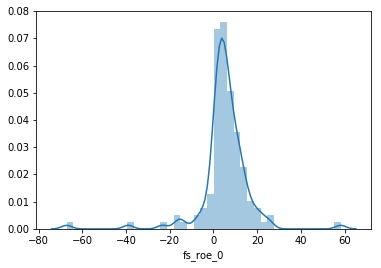

In [2]:
sns.distplot(df_section['fs_roe_0'])

### 二、绘制双变量散点分布和各自的密度分布图

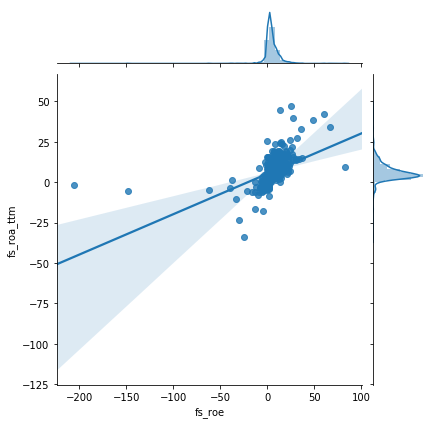

In [5]:
df = DataSource('financial_statement_CN_STOCK_A').read(start_date='2017-01-01',end_date='2019-01-02').dropna()
# 绘制净资产收益率和总资产报酬率(TTM)双变量的散点分布图
sns.jointplot(x='fs_roe', y='fs_roa_ttm', data=df,kind='reg')

### 三、绘制DataFrame各列两两之间的散点分布

In [6]:
df_0 = df[['fs_account_payable','fs_account_receivable','fs_capital_reserves','fs_construction_in_process','fs_undistributed_profit']]

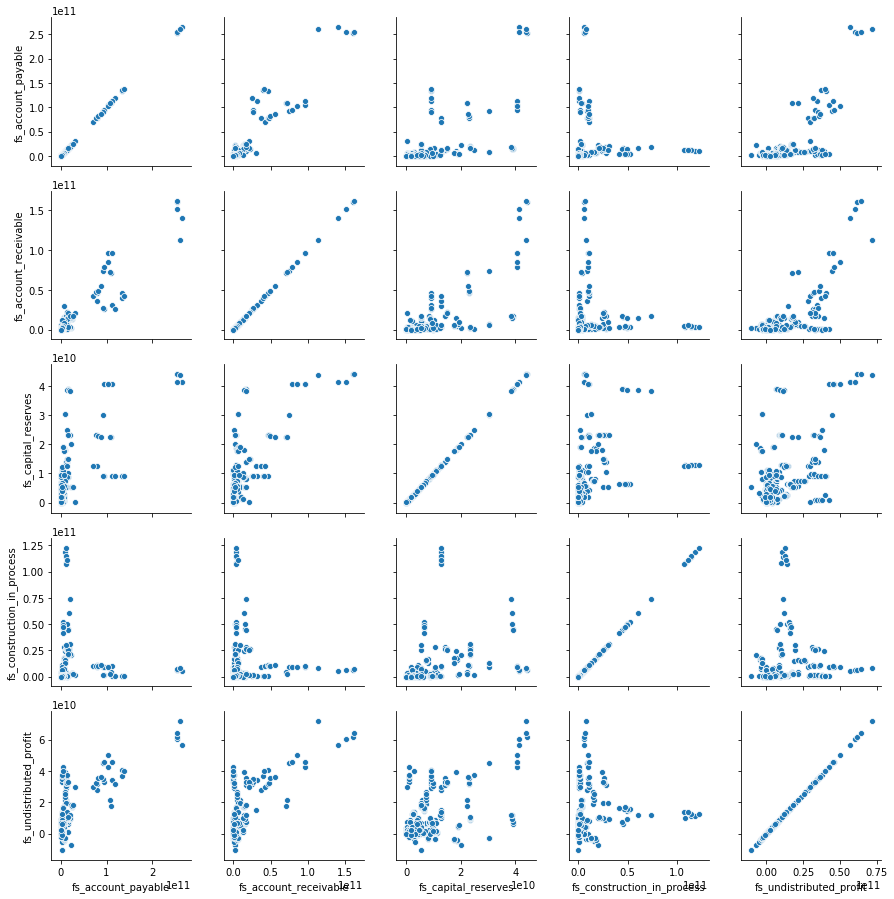

In [7]:
grid = sns.PairGrid(df_0)
grid.map(sns.scatterplot)

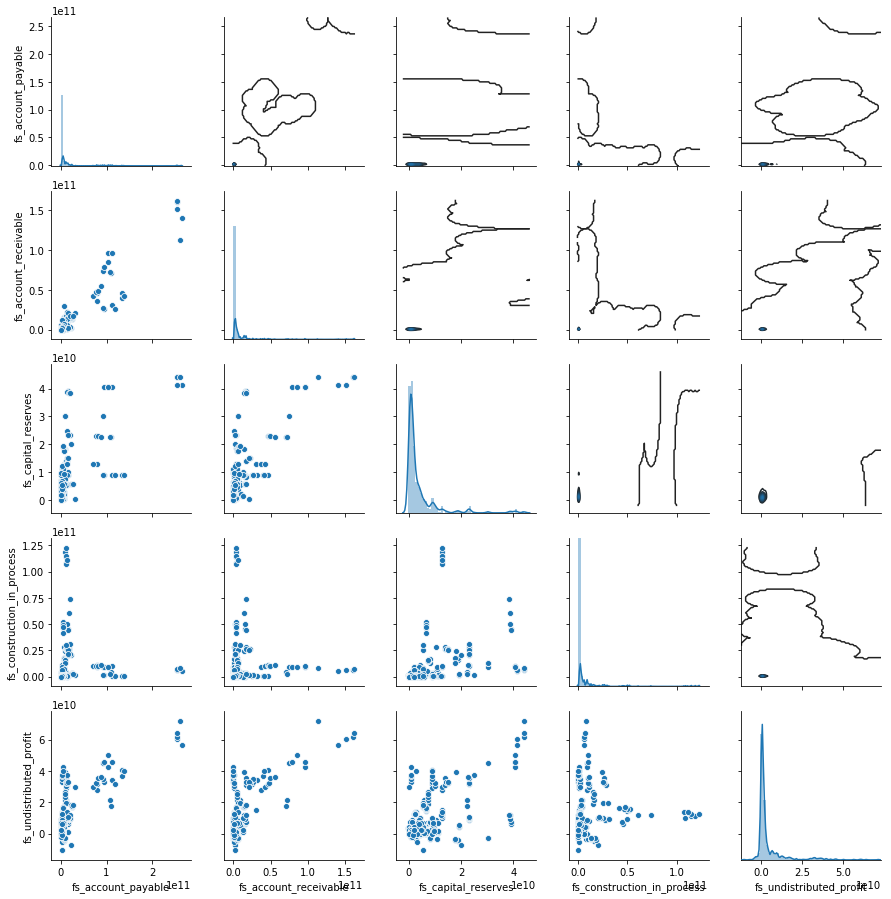

In [8]:
# 灵活的绘图类型设置
grids = sns.PairGrid(df_0)  
grids.map_diag(sns.distplot)  
grids.map_upper(sns.kdeplot)  
grids.map_lower(sns.scatterplot)

#### 四、箱形图（Box-plot）又称为盒式图或箱线图，是一种用作显示一组数据分散情况的统计图。
它能显示出一组数据的最大值、最小值、中位数、及上下四分位数
主要包含六个数据节点，将一组数据从大到小排列，分别计算出他的上边缘，上四分位数Q3，中位数，下四分位数Q1，下边缘，还有一个异常值

方便观察异常值：不加剔除地把异常值包括进数据的计算分析过程中，对结果会带来不良影响；重视异常值的出现，分析其产生的原因，常常成为发现问题进而改进决策的契机

箱形图判断异常值的标准以四分位数和四分位距为基础，四分位数具有一定的耐抗性，多达25%的数据可以变得任意远而不会很大地扰动四分位数，所以异常值不能对这个标准造成影响，箱形图识别异常值的结果比较客观。由此可见，箱形图在识别异常值方面有一定的优越性

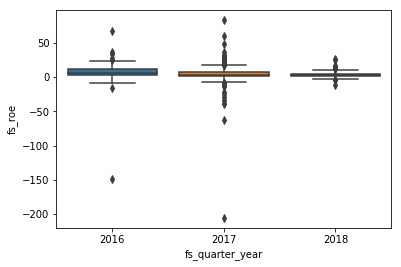

In [29]:
sns.boxplot(x='fs_quarter_year', y='fs_roe', data=df)

##### 各数据的四分位距大小，正常值的分布是集中还是分散，观察各方盒和线段的长短便可明了。每批数据分布的偏态如何，分析中位线和异常值的位置也可估计出来。

#### 五、小提琴图 (Violin Plot) 用于显示数据分布及其概率密度
中间的黑色粗条表示四分位数范围，从其延伸的幼细黑线代表 95% 置信区间，而白点则为中位数。

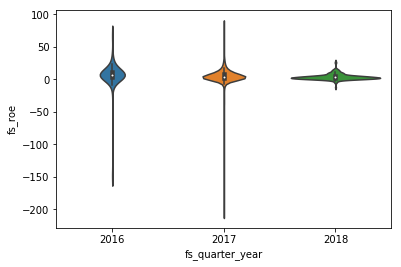

In [30]:
sns.violinplot(x='fs_quarter_year', y='fs_roe', data=df)

### 六、散点图(swarmplot)
观察每个数据点

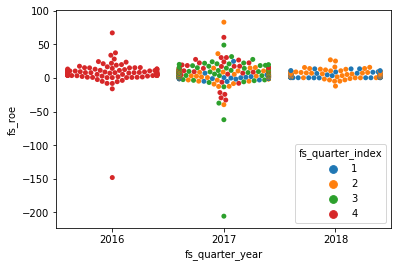

In [43]:
sns.swarmplot(x='fs_quarter_year', y='fs_roe', data=df, hue='fs_quarter_index')